# BASEBALL 

Data Description: In this dataset, Dependet variable and indepedent variables contains the descrate continues values, dependent variable is Number of matches win the team 

These are the name of Features from the dataset -:

1. Runs

2. At Bats

3. Hits

4. Doubles

5. Triples

6. Homeruns

7. Walks

8. Strikeouts

9. Stolen Bases

10. Runs Allowed

11. Earned Runs

12. Earned Run Average (ERA)

13. Shutouts

14. Saves

15. Errors



In [1]:
#importing the libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')


In [3]:
#loading the data set
df= pd.read_csv('Baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


Observation: All variables contains descrate contineous values ,not hava any catergorial data 

In [4]:
df.shape

(30, 17)

Observation : 
1.Dataset contains the only 30 Rows and 17 characterstics out which 1 is the Dependent variable and 16 the independent variables 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
W      30 non-null int64
R      30 non-null int64
AB     30 non-null int64
H      30 non-null int64
2B     30 non-null int64
3B     30 non-null int64
HR     30 non-null int64
BB     30 non-null int64
SO     30 non-null int64
SB     30 non-null int64
RA     30 non-null int64
ER     30 non-null int64
ERA    30 non-null float64
CG     30 non-null int64
SHO    30 non-null int64
SV     30 non-null int64
E      30 non-null int64
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


Observation: 
1. dataset contains interger and float values 
2. 16 variables conatins intger data types and 1 float dataypes  

In [6]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

Observation: 
1. Dataset conatins the no null values 

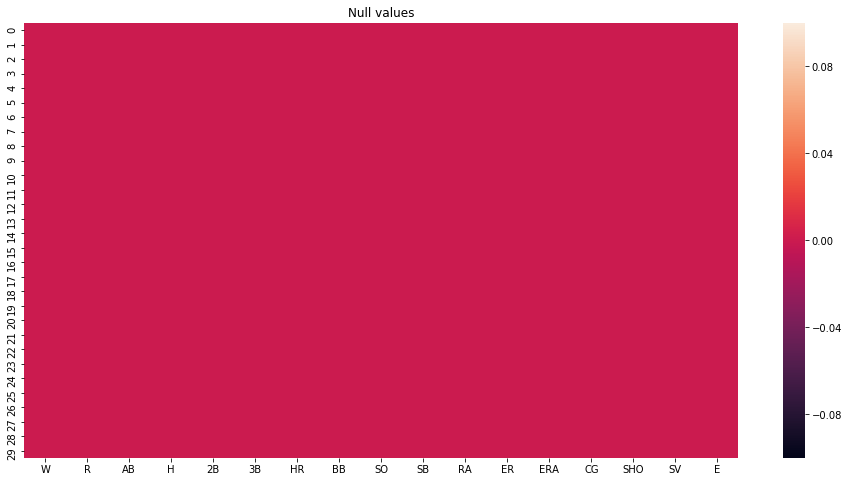

In [14]:
#Heat map to check the null values

plt.figure(figsize=[16,8])
sns.heatmap(df.isnull())
plt.title('Null values')
plt.show()

Observation: 
1. No variable columns contains missing and null values 

In [15]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Observation:

1. we clearly notice that dependent variable median value is grater then mean value and Equal data distrubtion from min 25%, 50% 75%  and max values

2. Count of the all columns values are same 

3. Min and Max there is no much defferance 

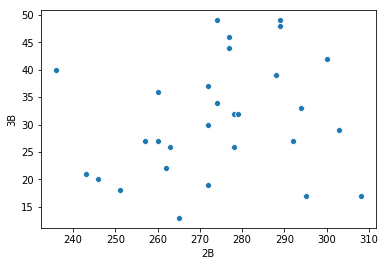

In [16]:
sns.scatterplot(x=df['2B'], y=df['3B'])


Observation: 2B and 3B data spreaded all over the dataset, some of the points are far from the group

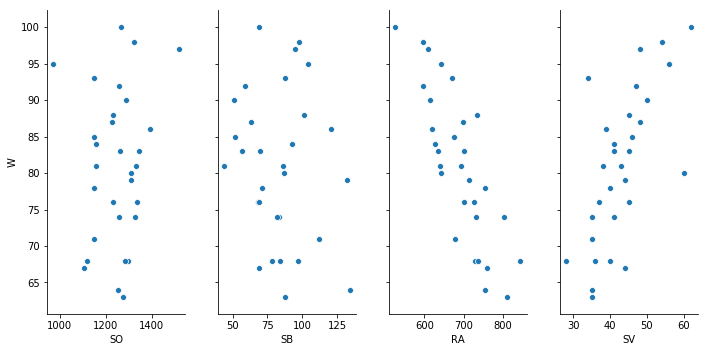

In [18]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(df, x_vars=['SO','SB','RA','SV'], y_vars='W', size=5, aspect=0.5)

Observation:
We clearly see variable SOis almost nutral , RA have negative realtion with Win scatter data points reflecting downward directions
SV have positive relation with the Win

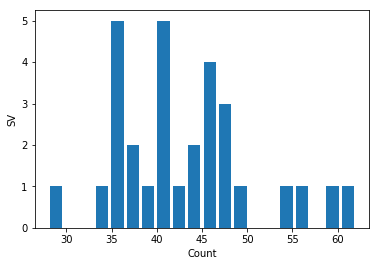

In [19]:
plt.hist(df.SV, bins=20, rwidth=0.8)
plt.xlabel("Count")
plt.ylabel('SV')
plt.show()

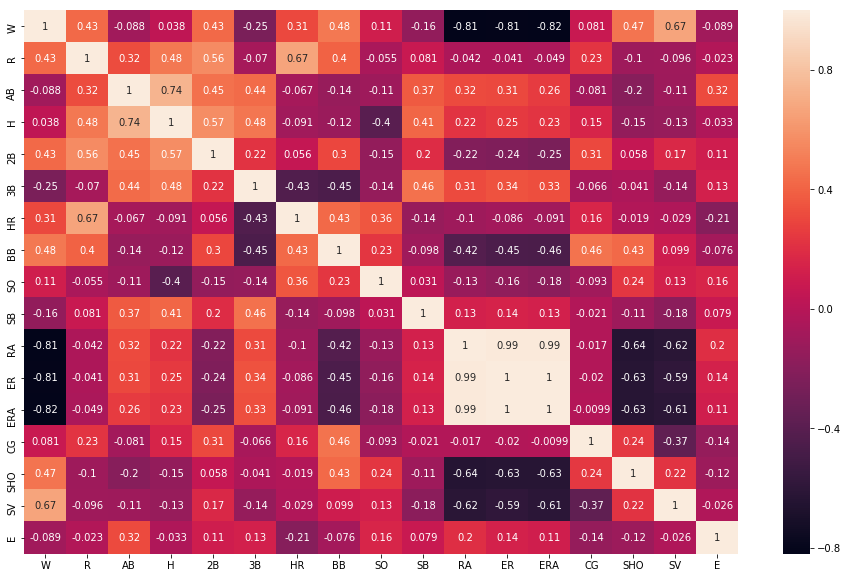

In [20]:
#To check the corr_mat  Heatmap
corr_hmap=df.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_hmap, annot=True)
plt.show()

Observation: 
1 .independate variable Hits(H) and at Bat(AB)  have positive corealtion 0.74
2. Run(R) and Home Run (HR) have positive corelation 0.67  
3. Dependent variable Win(W) and independent variable Run allowed(RA) have negative realtion -0.81

In [22]:
#to display the correaltion with dependent variables 

corr_matrix=df.corr()
corr_matrix['W'].sort_values(ascending = False)


W      1.000000
SV     0.666530
BB     0.484342
SHO    0.471805
R      0.430751
2B     0.427797
HR     0.307407
SO     0.111850
CG     0.080533
H      0.037612
AB    -0.087947
E     -0.089485
SB    -0.157234
3B    -0.251118
ER    -0.809435
RA    -0.812952
ERA   -0.819600
Name: W, dtype: float64

Observation:
Strong positive Corelation: SV,BB,SHO,R,2B,HR,SO,CG,H

1. feature variable Saves(SV) have positive relation with the target variable win(W) 0.66

Strong Negative Corelation:AB,E,SB,3B,ER,RA,ERA
2. 7 Variables have negative corelation with dependent variable win(w)


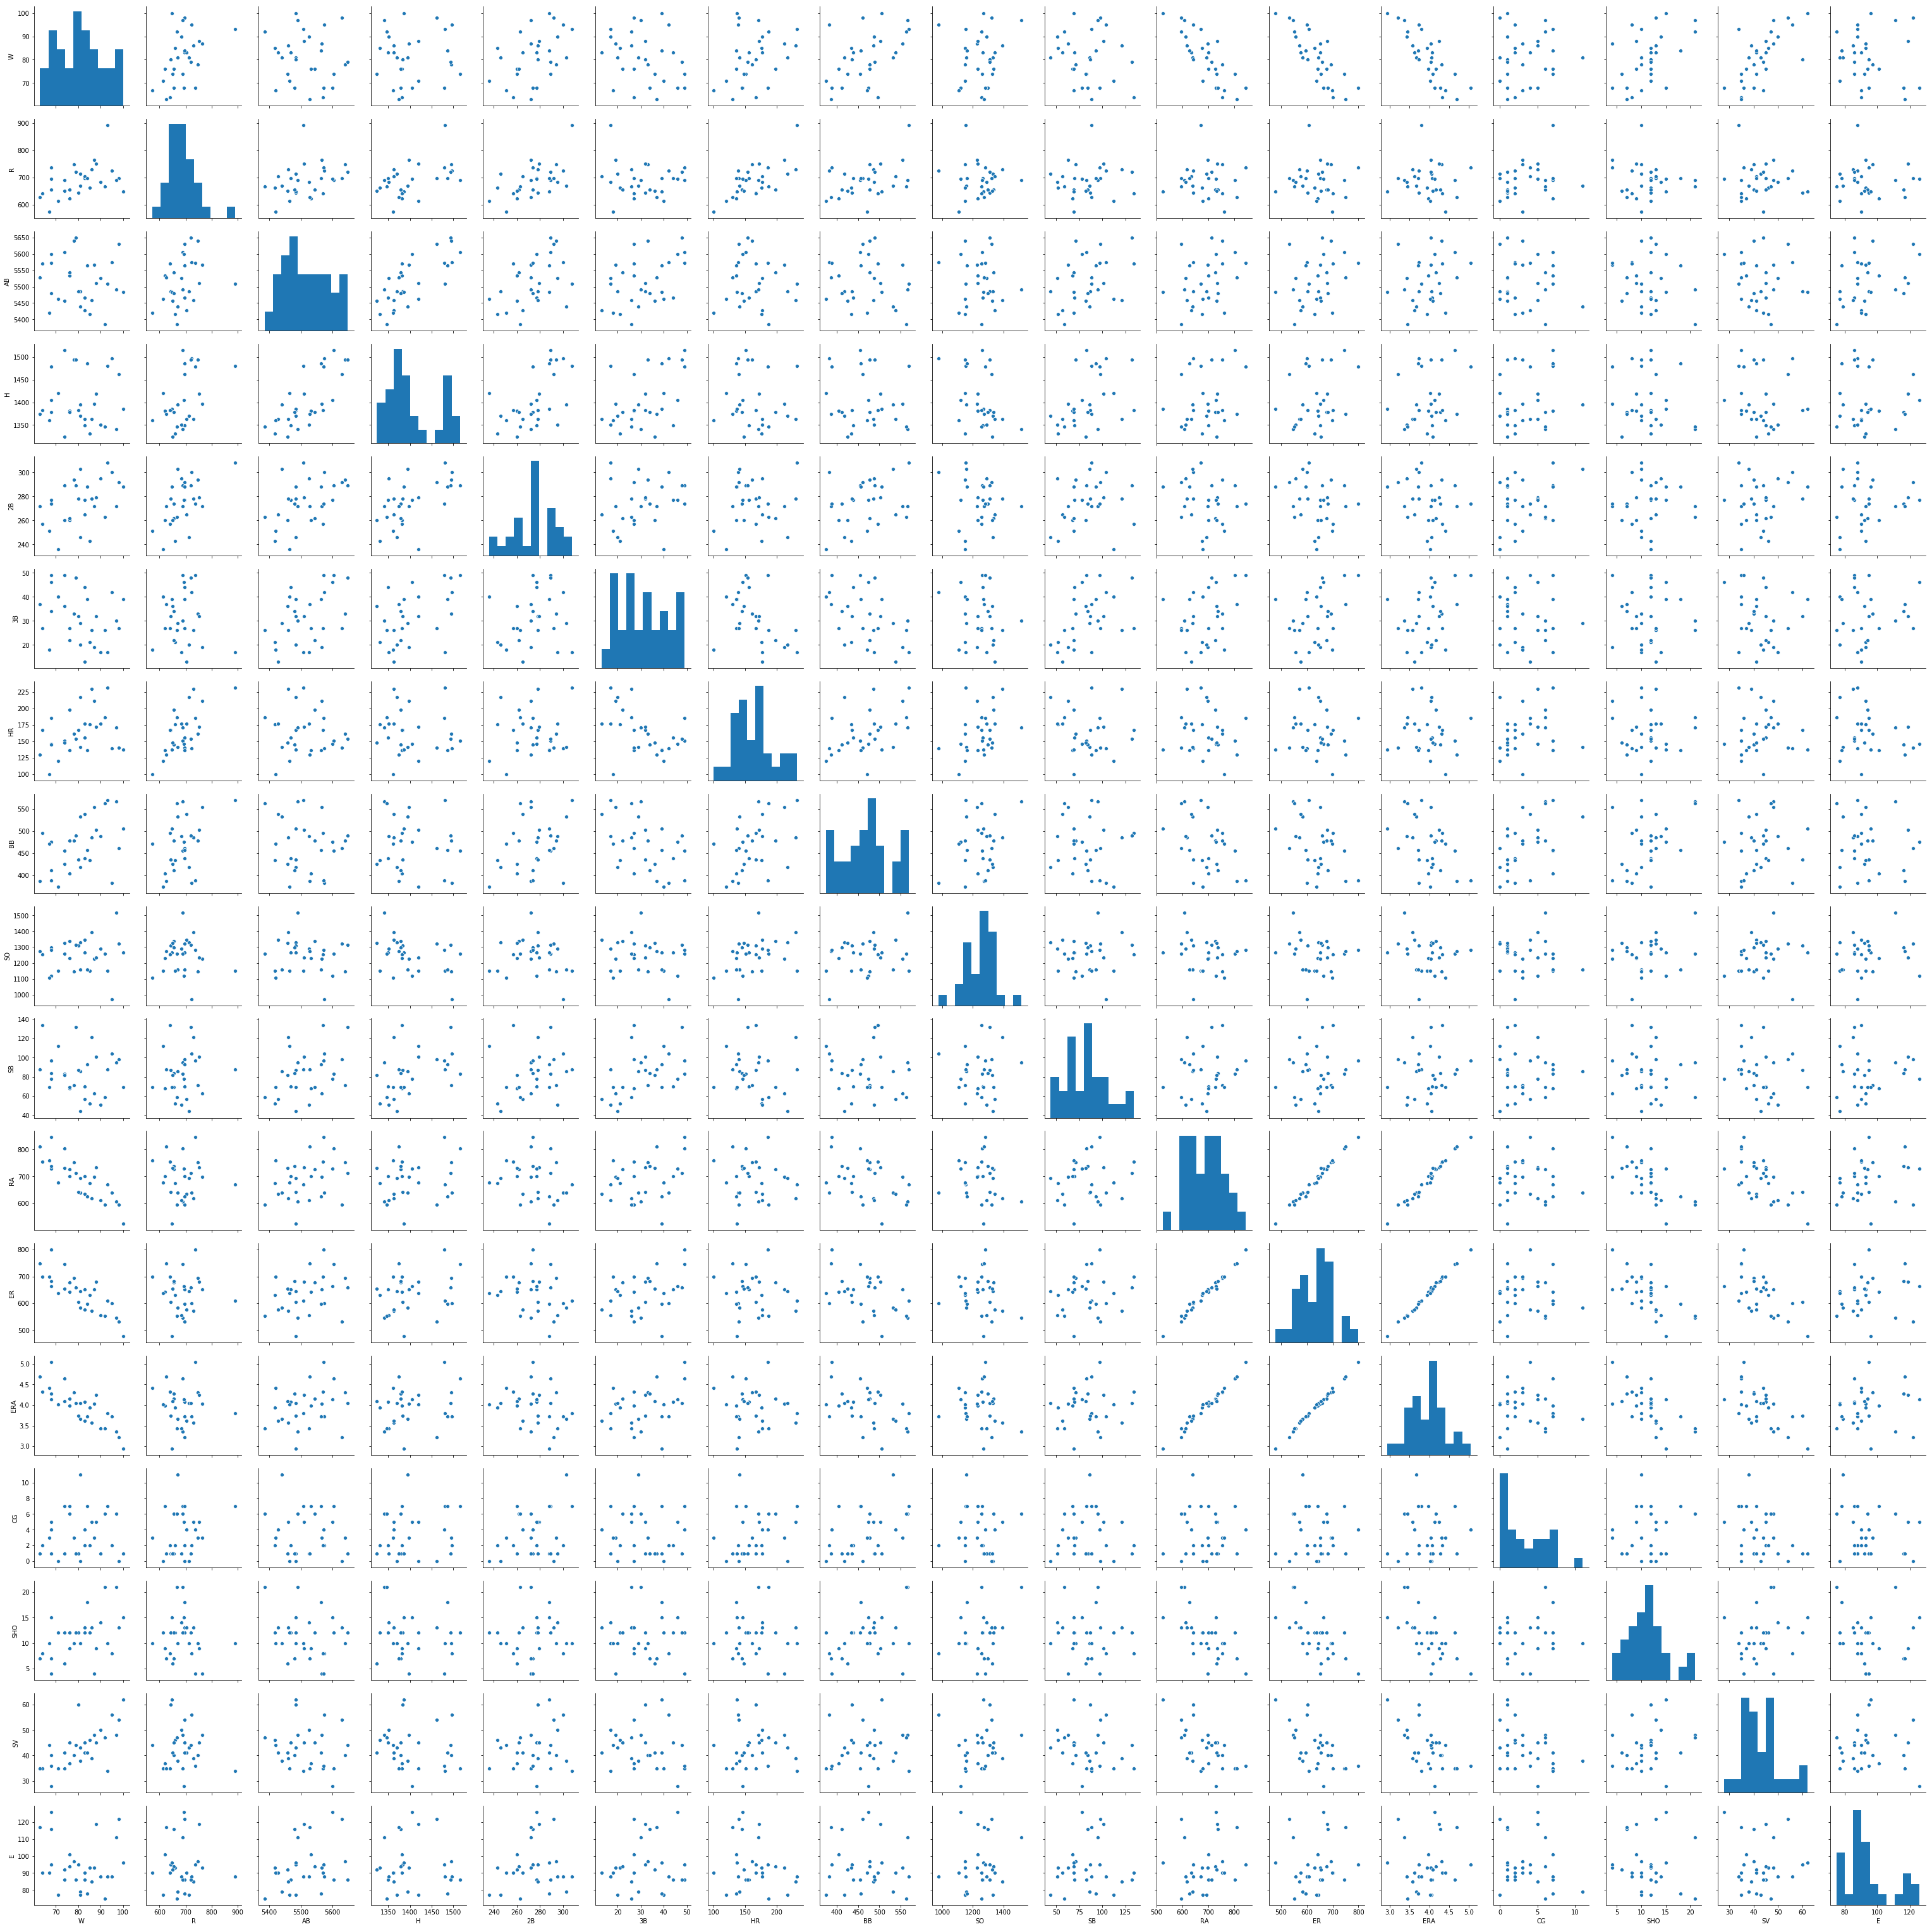

In [119]:
# plot pairplot
sns.pairplot(df)
plt.show()

Observation: we not geeting much information here due plot are very small

In [23]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [24]:
columns = ['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E']

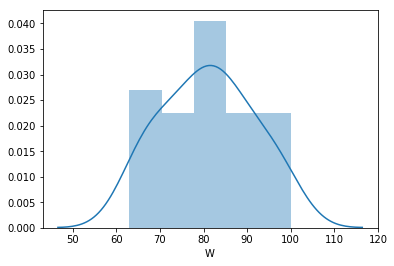

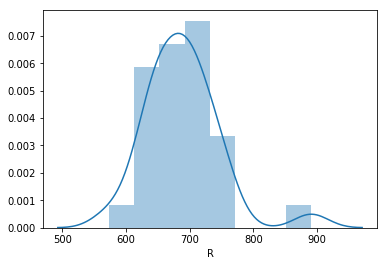

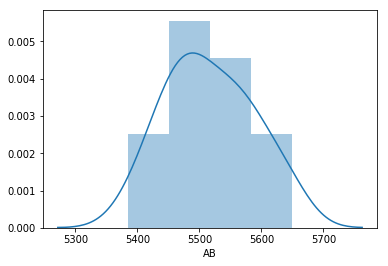

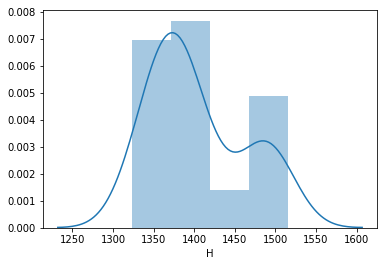

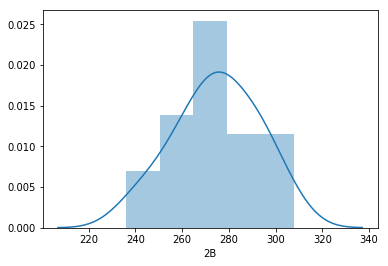

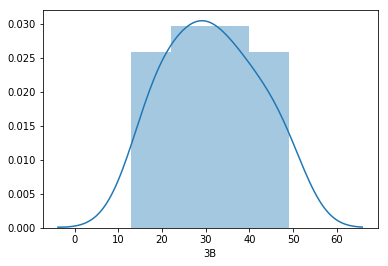

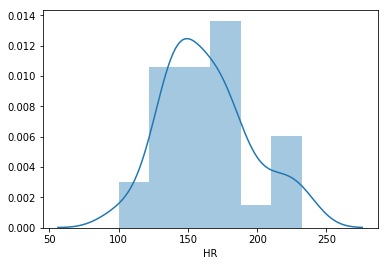

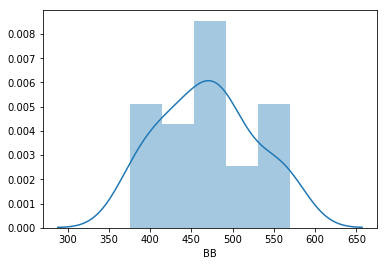

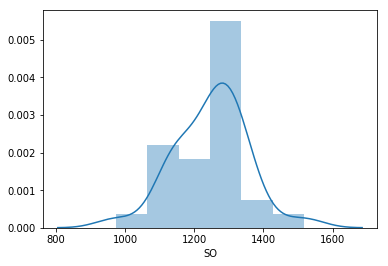

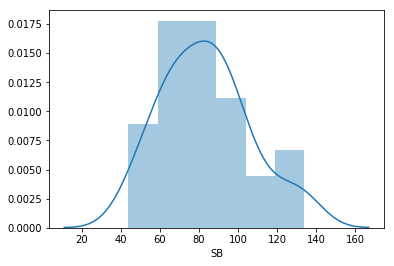

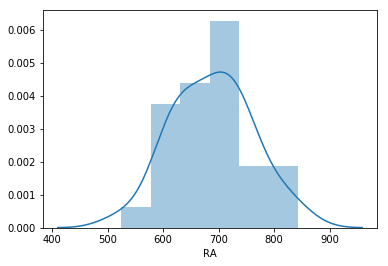

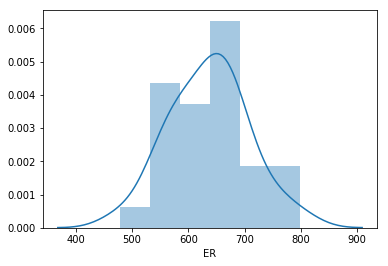

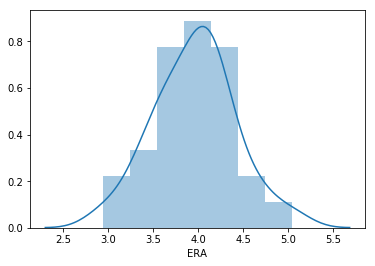

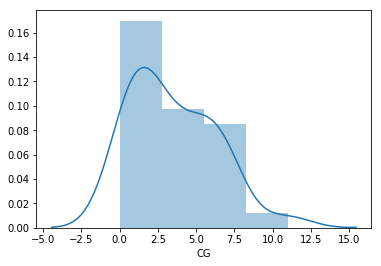

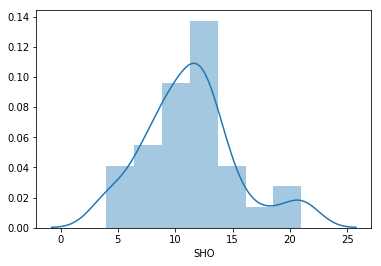

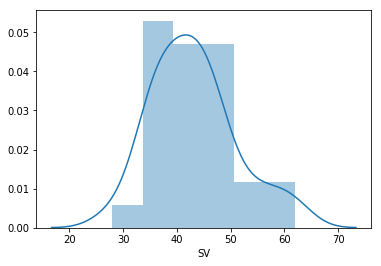

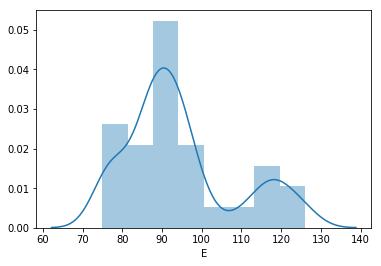

In [25]:
for i in df[columns]:
    plt.figure()
    sns.distplot(df[i])

Obsravation :
1. feature Vraiable AB, 2B, 3B, BB, ER, ERA data normaly distributed and have bell shape curve   
2. Variables E,SV, SHO, CG,H, R data not distributes normaly and not fromed the bell shape curve


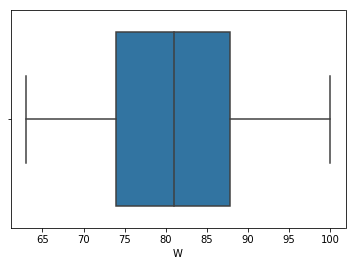

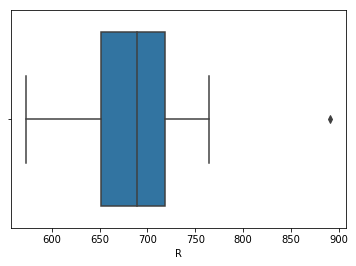

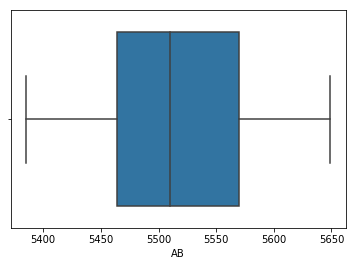

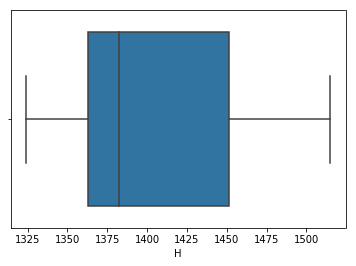

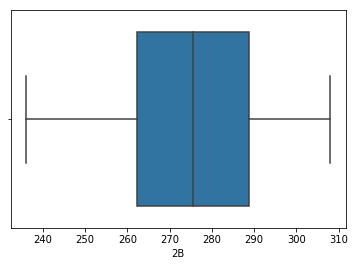

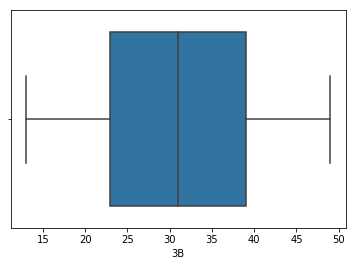

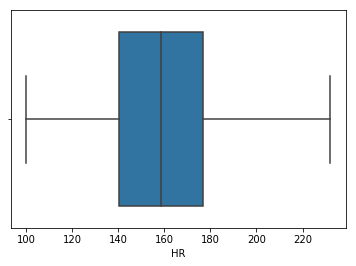

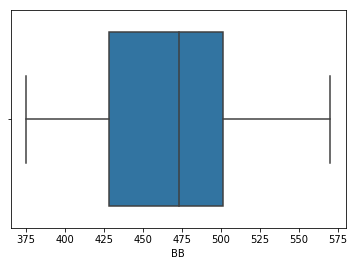

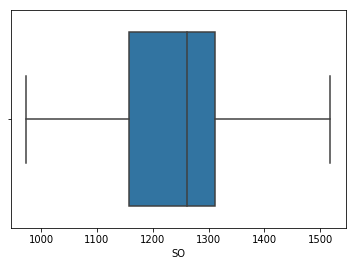

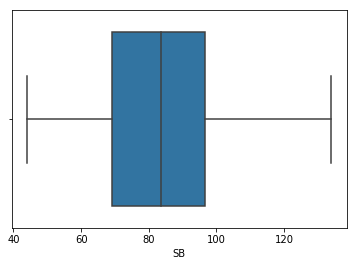

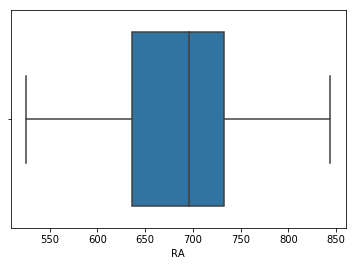

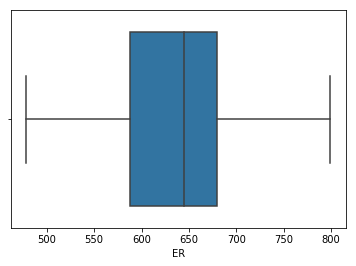

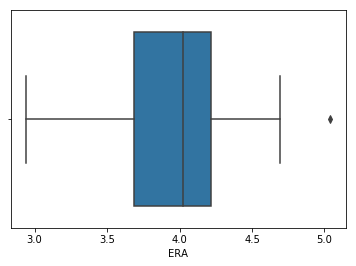

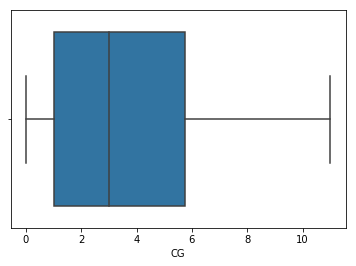

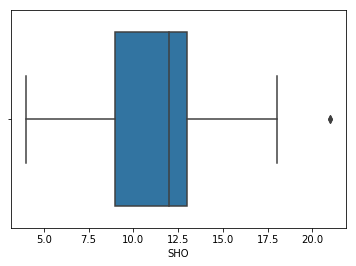

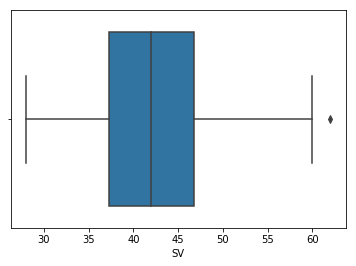

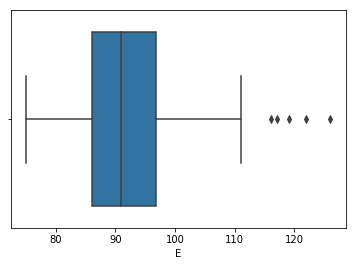

In [31]:
#Box plot check the outliers are there in data set 

for i in df[columns]:
    plt.figure()
    sns.boxplot(df[i])

Observation: 
1. Variables R, ERA, SHO, SV, E have outliers in the columns so need to treat them
2. W, AB,H, 2B, 3B,HR,BB,SO,SB, RA, ER,CG not have the outlier in columns 

In [32]:
#Spliting the data set 
x =df.drop(['W'],axis=1)
y=df['W']

In [33]:
#spliting the dataset into tarining and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [34]:
#checking the shape of the data
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)



(24, 16) (6, 16)
(24,) (6,)


In [68]:
#finding the outliers in training dataset
from sklearn.neighbors import LocalOutlierFactor
Find_out = LocalOutlierFactor()
outliers = Find_out.fit_predict(x_train)
outliers

array([ 1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1])

In [69]:
#selecting the row that not outliers 
no_outlier = outliers != -1
no_outlier

array([ True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True])

In [70]:
x_train, y_train = x_train[no_outlier], y_train[no_outlier]
#outlier removed from the training dataset

In [71]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)


(21, 16) (6, 16)
(21,) (6,)


#### LinearRegression Model

In [72]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
model=regressor.fit(x_train, y_train)

In [73]:
y_pred = regressor.predict(x_test)
#Predicting the number of win matches by passing the values 
#y_pred
y_pred.reshape(-1,1)


array([[91.24770018],
       [91.15078632],
       [75.20211104],
       [80.92563255],
       [70.93066003],
       [56.58504942]])

In [75]:
t=[689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86]
regressor.predict([t])

array([73.98738876])

Observation: We getting the prediction near to the acutal value of the win  
1. Predicted value:73.92, actual value is: 74

In [76]:
print("Mean absolute error:",mean_absolute_error(y_test,y_pred))
print("Mean squared error:", mean_squared_error(y_test,y_pred))
print('Root mean Squared error:', np.sqrt(mean_squared_error(y_test,y_pred)))


Mean absolute error: 9.125838909869268
Mean squared error: 110.30122837797875
Root mean Squared error: 10.502439163260064


In [77]:
model.coef_

array([ 6.36622566e-02, -1.37284722e-01,  9.21153050e-02, -6.43461050e-03,
        3.27650098e-01,  1.47253446e-01, -4.03504558e-02, -4.28161923e-02,
       -4.56301103e-02,  6.28782147e-01,  3.25023837e-01, -1.69350156e+02,
        2.22347989e-01, -8.01128480e-01,  3.80918943e-01, -1.53145531e-01])

In [78]:
model.intercept_

745.9724297910506

In [79]:
#R2 score --> coefficient of determination 
from sklearn.metrics import r2_score
print("R2 Score",r2_score(y_test, y_pred))

R2 Score -0.6998476976058365


Observation: We getting the R2 score is 66 % ,aftr removal of outliers we getting R2 score is -0.69

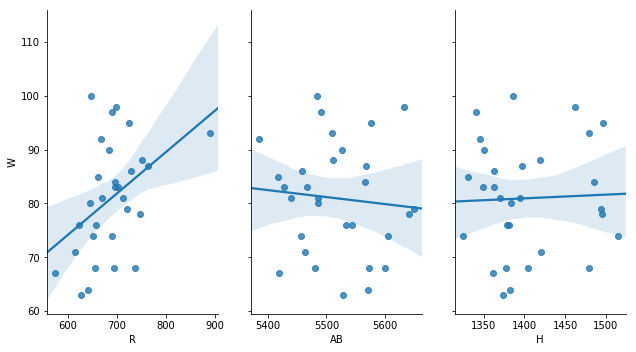

In [81]:
# Plotting the Least Squares Line
sns.pairplot(df, x_vars=['R','AB','H'], y_vars='W', size=5, aspect=0.6, kind='reg')

Observation:
1. We clearly see the line upward direction so its R(run) have postive relation with  W(win)

### DecisionTreeRegressor

In [82]:
from sklearn.tree import DecisionTreeRegressor
DCTR = DecisionTreeRegressor(random_state = 0)
DCTR.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [83]:
#Predicting the number of win matches by passing the values 
d_pred = DCTR.predict(x_test)

DCTR.predict([[0,50,10,32,0,1,0,973,0,0,0,3.73,8,0,56,0]])

array([92.])

In [84]:
print("Mean absolute error:",mean_absolute_error(y_test,d_pred))
print("Mean squared error:", mean_squared_error(y_test,d_pred))
print('Root mean Squared error:', np.sqrt(mean_squared_error(y_test,d_pred)))
print("R2 Score", r2_score(y_test, d_pred))


Mean absolute error: 8.833333333333334
Mean squared error: 107.83333333333333
Root mean Squared error: 10.384282995630143
R2 Score -0.6618150684931505


In [85]:
DCTR.predict([t])

array([74.])

Observation: Descision Tree Regression is predicting the value accurately and we getting -1.45% R2_ score  so we are saving the model
Acutal value is 74 wins model predict value also 74 wins

#### Random Forest Regression model 

In [86]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators = 10, random_state = 0)
RFR.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [87]:
RFR.predict([t])

array([72.5])

In [88]:
RFR_pred=RFR.predict(x_test)
RFR_pred

array([83. , 77.1, 76.4, 72.3, 84.1, 68.2])

In [89]:
print("Mean absolute error:",mean_absolute_error(y_test,RFR_pred))
print("Mean squared error:", mean_squared_error(y_test,RFR_pred))
print('Root mean Squared error:', np.sqrt(mean_squared_error(y_test,RFR_pred)))
print("R2 Score", r2_score(y_test, RFR_pred))


Mean absolute error: 4.416666666666667
Mean squared error: 47.88500000000001
Root mean Squared error: 6.919898843191279
R2 Score 0.26204623287671225


Obseravation: Random forest model predicting the value very close, Actual value is 74 wins  model predicted 72.8 wins 

#### SVR model

In [90]:
from sklearn.svm import SVR
SVM = SVR(kernel = 'rbf')
SVM.fit(x_train, y_train)

SVM_pred=SVM.predict(x_test)

# Predicting a new result
SVM_pred

array([80., 80., 80., 80., 80., 80.])

In [91]:
SVM.predict([t])

array([79.])

In [92]:

print("Mean absolute error:",mean_absolute_error(y_test,SVM_pred))
print("Mean squared error:", mean_squared_error(y_test,SVM_pred))
print('Root mean Squared error:', np.sqrt(mean_squared_error(y_test,SVM_pred)))
print("R2 Score", r2_score(y_test, SVM_pred))


Mean absolute error: 6.666666666666667
Mean squared error: 70.33333333333333
Root mean Squared error: 8.386497083606082
R2 Score -0.08390410958904093


Observation: We have predicated value of target variable Win is 80.97 but actual value is 74

Saving the model 

In [67]:
from sklearn.externals import joblib
  
# Save the model as a pickle in a file
joblib.dump(DCTR, 'DCTR.pkl')
  
# Load the model from the file
DCTR_joblib = joblib.load('DCTR.pkl') 
  
# Use the loaded model to make predictions
#DCTR_joblib.predict(x_test)
